[INFO] filtering variables ...


D:\Anaconda\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


D:\Anaconda\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


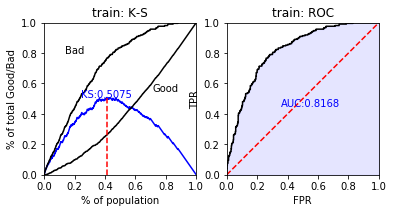

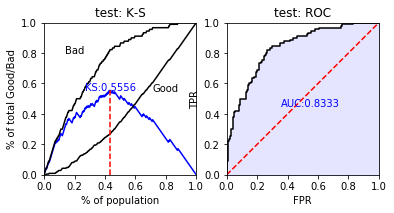

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


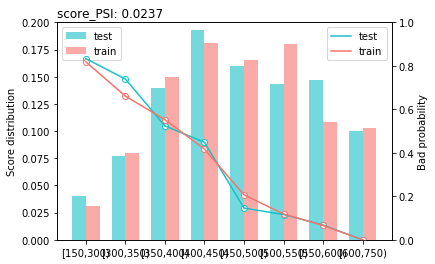

{'psi':   variable       PSI
 0    score  0.023746, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [2]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc

%matplotlib inline
# data prepare ------
# load germancredit data
dat = sc.germancredit()

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

# woe binning ------
bins = sc.woebin(dt_s, y="creditability")
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [23]:
bins

{'other.installment.plans':                   variable            bin  count  count_distr  good  bad  \
 0  other.installment.plans  bank%,%stores    186        0.186   110   76   
 1  other.installment.plans           none    814        0.814   590  224   
 
     badprob       woe    bin_iv  total_iv         breaks  is_special_values  
 0  0.408602  0.477551  0.045936  0.057592  bank%,%stores              False  
 1  0.275184 -0.121179  0.011656  0.057592           none              False  ,
 'age.in.years':        variable          bin  count  count_distr  good  bad   badprob  \
 0  age.in.years  [-inf,26.0)    190        0.190   110   80  0.421053   
 1  age.in.years  [26.0,28.0)    101        0.101    74   27  0.267327   
 2  age.in.years  [28.0,35.0)    257        0.257   172   85  0.330739   
 3  age.in.years  [35.0,37.0)     79        0.079    67   12  0.151899   
 4  age.in.years   [37.0,inf)    373        0.373   277   96  0.257373   
 
         woe    bin_iv  total_iv breaks 

In [21]:
if x is None:
    print('ya')

ya
